In [78]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
pip install s3fs

  Using cached s3fs-0.5.2-py3-none-any.whl (22 kB)
Processing /home/jovyan/.cache/pip/wheels/03/72/9a/4212a33194f60ef51f0b3659f153d5c3284e3e8b67481105fb/aiobotocore-1.2.0-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73/wrapt-1.12.1-cp38-cp38-linux_x86_64.whl
  Using cached aiohttp-3.7.3-cp38-cp38-manylinux2014_x86_64.whl (1.5 MB)
  Using cached aioitertools-0.7.1-py3-none-any.whl (20 kB)
  Using cached botocore-1.19.52-py2.py3-none-any.whl (7.2 MB)
  Using cached yarl-1.6.3-cp38-cp38-manylinux2014_x86_64.whl (324 kB)
  Using cached multidict-5.1.0-cp38-cp38-manylinux2014_x86_64.whl (159 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
data = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/Fraud_Data.csv")
ip_country = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/IpAddress_to_Country.csv")

In [41]:
data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [42]:
data.head(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [6]:
ip_country.head(10)
ip_country.describe()
ip_country['country'].nunique()

235

Adding country column to data

In [43]:
def transform_ip(arg):

    try:
        return ip_country.country[(ip_country.lower_bound_ip_address<arg)&(ip_country.upper_bound_ip_address>arg)].iloc[0]
    except IndexError:
        return "Unknown country"
                                  
data['country']=data.ip_address.apply(transform_ip)                                 

In [44]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown country
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


<AxesSubplot:xlabel='browser', ylabel='class'>

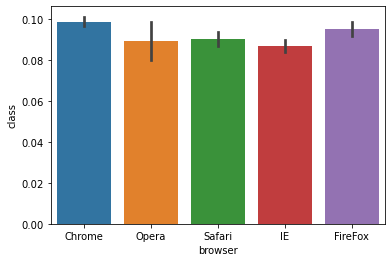

In [9]:
sns.barplot(x="browser", y="class", data=data)

<AxesSubplot:xlabel='source', ylabel='class'>

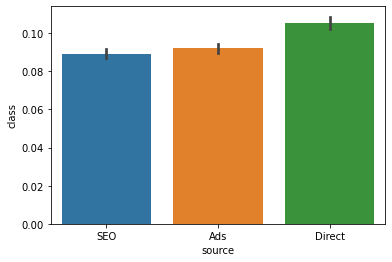

In [14]:
sns.barplot(x="source", y="class", data=data)

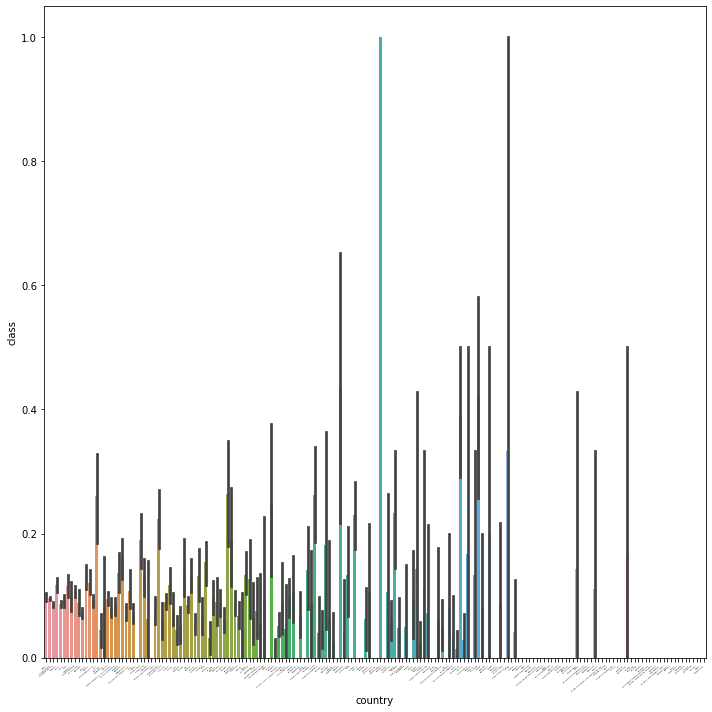

In [15]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="class", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=2)
plt.tight_layout()
plt.show()


filtering by countries>50 samples

In [45]:
country_counts = data['country'].value_counts()
print(country_counts[country_counts > 50].index.values)

['United States' 'Unknown country' 'China' 'Japan' 'United Kingdom'
 'Korea Republic of' 'Germany' 'France' 'Canada' 'Brazil' 'Italy'
 'Australia' 'Netherlands' 'Russian Federation' 'India'
 'Taiwan; Republic of China (ROC)' 'Mexico' 'Sweden' 'Spain'
 'South Africa' 'Switzerland' 'Poland' 'Argentina' 'Indonesia' 'Norway'
 'Colombia' 'Turkey' 'Viet Nam' 'Romania' 'Denmark' 'Hong Kong' 'Finland'
 'Austria' 'Ukraine' 'Chile' 'Belgium' 'Iran (ISLAMIC Republic Of)'
 'Egypt' 'Czech Republic' 'Thailand' 'New Zealand' 'Israel' 'Saudi Arabia'
 'Venezuela' 'Ireland' 'European Union' 'Greece' 'Portugal' 'Hungary'
 'Malaysia' 'Singapore' 'Pakistan' 'Philippines' 'Bulgaria' 'Morocco'
 'Algeria' 'Peru' 'Tunisia' 'United Arab Emirates' 'Ecuador' 'Lithuania'
 'Seychelles' 'Kenya' 'Kazakhstan' 'Kuwait' 'Costa Rica' 'Slovenia'
 'Slovakia (SLOVAK Republic)' 'Uruguay' 'Croatia (LOCAL Name: Hrvatska)'
 'Luxembourg' 'Belarus' 'Serbia' 'Nigeria' 'Latvia' 'Panama' 'Bolivia'
 'Dominican Republic']


Droping lines with rare values of country_name (< 50 occurences)

In [46]:
to_keep = country_counts[country_counts > 50].index.values
data = data.loc[data['country'].isin(to_keep), :]

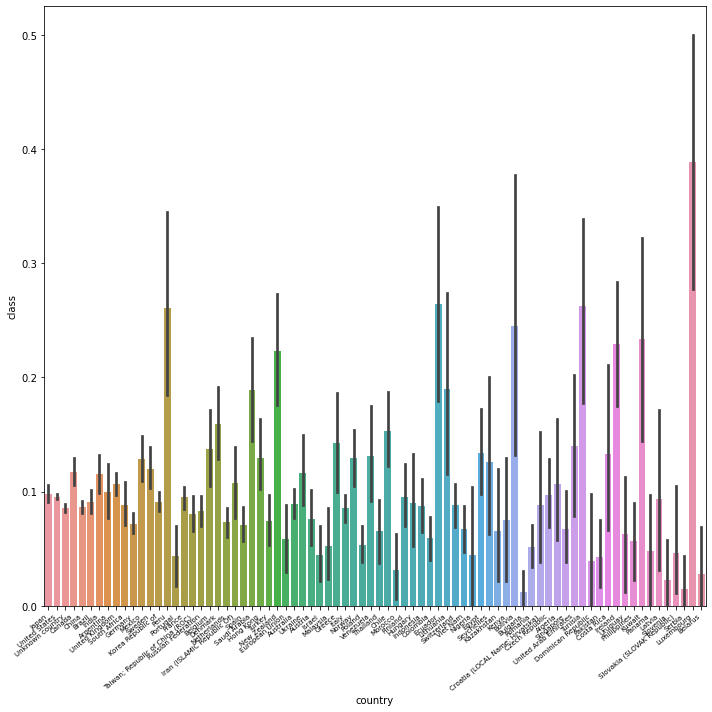

In [18]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="class", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=7)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='purchase_value'>

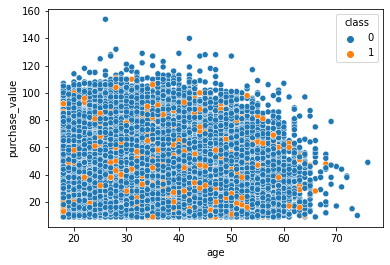

In [19]:
sns.scatterplot(data=data, x="age", y="purchase_value", hue="class")

Estimating time attributes from datetime data

In [47]:
from datetime import datetime
import datetime as dt
from datetime import timedelta

data.loc[:, 'signup_time']=pd.to_datetime(data.loc[:, 'signup_time'])
data.loc[:, 'purchase_time']=pd.to_datetime(data.loc[:, 'purchase_time'])
t1=pd.to_datetime(data.signup_time)
t2=pd.to_datetime(data.purchase_time)

data['dt']=pd.to_timedelta(t2 - t1)
data['hour'] =(data['dt'].dt.days*24)+(data['dt'].dt.seconds/3600)
data['month'] = pd.DatetimeIndex(data['purchase_time']).month

<AxesSubplot:xlabel='month', ylabel='class'>

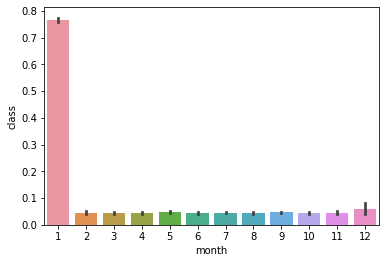

In [56]:
sns.barplot(x="month", y="class", data=data)

# DATA CLEANING

In [50]:
# Drop columns with too many unique values
#data = data.drop(['signup_time', 'purchase_time', 'device_id','ip_address','dt','user_id'], axis=1)
data.head(20)
data1=data

In [51]:
#storing cleaned dataframe in csv
data.to_csv("fraude_activities_dataset_cleaned.csv",index_label=None,index=False)

In [52]:
data_cleaned=pd.read_csv("fraude_activities_dataset_cleaned.csv",index_col=False)
data_cleaned.head()


,purchase_value,source,browser,sex,age,class,country,hour,month
0,34,SEO,Chrome,M,39,0,Japan,1251.856111,4
1,16,Ads,Chrome,F,53,0,United States,4.984444,6
2,15,SEO,Opera,M,53,1,United States,0.000278,1
3,44,SEO,Safari,M,41,0,Unknown country,136.690278,5
4,39,Ads,Safari,M,45,0,United States,1211.516944,9


In [53]:
features_list = ['purchase_value','source','browser','age','sex','country','month','hour']

target_name = 'class'

In [54]:
# Separate target variable Y from features X
print("Separating labels from features...")
Y = data_cleaned.loc[:,target_name]
X = data_cleaned.loc[:,[c for c in data_cleaned.columns if c!=target_name]] 
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

   purchase_value source browser sex  age          country         hour  month
0              34    SEO  Chrome   M   39            Japan  1251.856111      4
1              16    Ads  Chrome   F   53    United States     4.984444      6
2              15    SEO   Opera   M   53    United States     0.000278      1
3              44    SEO  Safari   M   41  Unknown country   136.690278      5
4              39    Ads  Safari   M   45    United States  1211.516944      9



In [58]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
print("...Done")
print(X[0:5,:])
print()
print(Y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[[34 'SEO' 'Chrome' 'M' 39 'Japan' 1251.8561111111112 4]
 [16 'Ads' 'Chrome' 'F' 53 'United States' 4.984444444444446 6]
 [15 'SEO' 'Opera' 'M' 53 'United States' 0.00027777777777777783 1]
 [44 'SEO' 'Safari' 'M' 41 'Unknown country' 136.69027777777777 5]
 [39 'Ads' 'Safari' 'M' 45 'United States' 1211.5169444444443 9]]

[0, 0, 1, 0, 0]


In [61]:
# Divide dataset into train set & test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y) # stratified splitting because we have an imbalanced dataset !!
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [62]:
# Create pipeline for numeric features
numeric_features = [0, 4, 6] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [1, 2, 3, 5, 7] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessing on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
[[29 'SEO' 'FireFox' 'F' 24 'Japan' 110.85583333333334 5]
 [19 'SEO' 'IE' 'M' 30 'United States' 1818.0808333333332 10]
 [52 'Direct' 'IE' 'M' 37 'Unknown country' 0.00027777777777777783 1]
 [44 'Direct' 'Chrome' 'F' 31 'United States' 72.77166666666666 5]
 [16 'Direct' 'Chrome' 'F' 42 'United States' 819.2736111111111 6]]
...Done.
  (0, 0)	-0.43296254252665767
  (0, 1)	-1.0591256639796414
  (0, 2)	-1.4478388621940075
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 42)	1.0
  (0, 90)	1.0
  (1, 0)	-0.9785247924444799
  (1, 1)	-0.36227925966760166
  (1, 2)	0.5175229812597264
  (1, 4)	1.0
  (1, 6)	1.0
  (1, 9)	1.0
  (1, 82)	1.0
  (1, 95)	1.0
  (2, 0)	0.8218306322843335
  (2, 1)	0.450708212029778
  (2, 2)	-1.5754560649784994
  (2, 3)	1.0
  (2, 6)	1.0
  (2, 9)	1.0
  (2, 83)	1.0
  (3, 0)	0.3853808323500757
  (3, 1)	-0.24613819228226172
  (3, 2)	-1.4916814535375027
  (3, 3)	1.0
  (3, 82)	1.0
  (3, 90)	1.0
  (4, 0)	-1.1421934674198266
  (4, 1)	1.0314135489564777
  (4, 

# Trying different classifiers

In [63]:
# Train Random Forest with grid search
rf = RandomForestClassifier()

params = {
    'n_estimators': [100, 120, 140, 160, 180],
    'max_depth': [4, 6, 8]
}

model = GridSearchCV(rf, param_grid = params, verbose=2)

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

print("Best hyperparameters : ")
print(model.best_params_)

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

# Print scores
print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

Training model...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] max_depth=4, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=4, n_estimators=100, total=   2.6s
[CV] max_depth=4, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .................... max_depth=4, n_estimators=100, total=   2.5s
[CV] max_depth=4, n_estimators=100 ...................................
[CV] .................... max_depth=4, n_estimators=100, total=   2.5s
[CV] max_depth=4, n_estimators=100 ...................................
[CV] .................... max_depth=4, n_estimators=100, total=   2.5s
[CV] max_depth=4, n_estimators=100 ...................................
[CV] .................... max_depth=4, n_estimators=100, total=   2.6s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .................... max_depth=4, n_estimators=120, total=   3.0s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .................... max_depth=4, n_estimators=120, total=   3.0s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .................... max_depth=4, n_estimators=120, total=   2.9s
[CV] max_depth=4, n_estimators=120 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.1min finished


...Done.
Best hyperparameters : 
{'max_depth': 8, 'n_estimators': 100}
Predictions on training set...
...Done.
[0 0 1 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]

f1-score on training set :  0.6991973205520587
f1-score on test set :  0.7023041474654378


In [ ]:
clf = SVC()
clf.fit(X_train, Y_train)

Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

In [69]:
tree = DecisionTreeClassifier() 
tree_param_grid = {"max_depth" : np.arange(1,10,1)}

gsTree = GridSearchCV(tree,tree_param_grid, cv=10, scoring="accuracy", verbose = 1)

gsTree.fit(X_train, np.ravel(Y_train))

tree_best = gsTree.best_estimator_

# Best score
print("best {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Tree", tree_best.score(X_train,Y_train), tree_best.score(X_test,Y_test)))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best Tree score on the train set : 
 0.9565721241225218 
 best Tree score on the test set : 
 0.9569146630206423


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   20.7s finished


In [70]:
gsTree.best_params_

{'max_depth': 1}

In [76]:
Log = LogisticRegression()
log_param_grid = {"class_weight": [None, "balanced"],
                 "C": [0.5, 0.6,0.7,0.8,0.9,1.0]}
gsLog = GridSearchCV(Log, log_param_grid, cv =10, scoring ='accuracy', n_jobs=-1, verbose=1)
gsLog.fit(X_train, Y_train)
gsLog_best = gsLog.best_estimator_

print("best {0} score on the train set : \n {1} \n best {0} score on the test set : \n {2}".format("Logistic regression", gsLog_best.score(X_train,Y_train), gsLog_best.score(X_test,Y_test)))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


best Logistic regression score on the train set : 
 0.9417154386140429 
 best Logistic regression score on the test set : 
 0.9421415946910328


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
